In [1]:
import selenium
from selenium import webdriver
import time
import pandas as pd
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
import requests
from IPython.display import display, Image
from selenium.webdriver.common.keys import Keys
import re
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

1. Write a python program which searches all the product under a particular product from www.amazon.in. The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.

In [2]:
# Setting up the WebDriver
service = Service(r"chromedriver.exe")
driver = webdriver.Chrome(service=service)

In [3]:
def search_products_amazon(product_input):
    
    url = 'https://www.amazon.in/'
    driver.get(url)
    
    # Entering the product name taken as input from user
    product = driver.find_element(By.XPATH, '//input[@class="nav-input nav-progressive-attribute"]')
    product.send_keys(product_input)

    # Clicking the search button
    search = driver.find_element(By.XPATH, '//input[@type="submit"]')
    search.click()
    time.sleep(3) # Giving time to load the page

In [4]:
product_input = input('Enter product name: ')
search_products_amazon(product_input)

Enter product name: guitar


2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product name. Details to be scraped are: "Brand Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“. 

In [5]:
def get_product_urls_amazon():
    
    url_list=[] 
    
    # Getting urls of all products for first 3 pages
    num_pages = 3
    for page in range(num_pages):
        urls = driver.find_elements(By.XPATH,
                        '//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
       
        for url in urls:    
            url_list.append(url.get_attribute('href'))
            
        try:
            next_page = driver.find_element(By.XPATH,
                            '//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]')
            next_page.click()
            time.sleep(3)
        except:
            break
        
    return url_list

In [6]:
url_list=get_product_urls_amazon()

In [7]:
product_details = []

In [8]:
for u in url_list:
    driver.get(u)
    time.sleep(3)
    
    name = driver.find_element(By.ID, "productTitle").text
    
    try:
        brand_row = driver.find_element(By.XPATH, '//tr[@class="a-spacing-small po-brand"]')
        brand = brand_row.find_element(By.XPATH, './/span[@class="a-size-base po-break-word"]').text
    except:
        brand = '-'
    
    try:
        price = driver.find_element(By.XPATH, '//span[@class="a-price-whole"]').text
    except:
        price = '-'
    
    try:
        return_policy = driver.find_element(By.ID, "RETURNS_POLICY").text
    except:
        return_policy = '-'
    
    try:
        delivery = driver.find_element(By.CLASS_NAME, "a-text-bold").text
    except:
        delivery = '-'
    
    try:
        availability = driver.find_element(By.ID, "availability").text
    except:
        availability = '-'
    
    data = {
        "Name of Product": name,
        "Brand Name": brand,
        "Price (₹)": price,
        "Return/Exchange": return_policy,
        "Expected Delivery": delivery,
        "Availability": availability,
        "Product URL": u
    }
    
    product_details.append(data)

In [9]:
driver.quit()

In [10]:
df = pd.DataFrame(product_details)
df

,Name of Product,Brand Name,Price (₹),Return/Exchange,Expected Delivery,Availability,Product URL
0,Kadence Frontier Jumbo Semi Acoustic Guitar Wi...,Kadence,"6,899",7 days Replacement,"Friday, 23 June",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,Kadence Frontier guitar with Online Guitar lea...,Kadence,"4,999",7 days Replacement,"Wednesday, 21 June",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,Vault DA40 41 Inch Premium Solid Spruce-Top Dr...,VAULT,"6,934",7 days Replacement,"Thursday, 22 June",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,ESH Creations E40CHEQ High Gloss Semi Acoustic...,ESH Creations,"5,899",7 days Replacement,"Monday, 3 July",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...",JUAREZ,"1,994",7 days Replacement,"Wednesday, 21 June",In stock,https://www.amazon.in/Juarez-Acoustic-Cutaway-...
...,...,...,...,...,...,...,...
162,Fender Acoustic Guitar Dreadnought CD60 V3 970...,Fender,"12,500",7 days Replacement,"Wednesday, 21 June",Only 1 left in stock,https://www.amazon.in/Fender-Dread-String-Acou...
163,"Yamaha C40M Classical Guitar, Sprucewood (Brown)",YAMAHA,-,Returns Policy,,,https://www.amazon.in/Yamaha-C40MII-Acoustic-C...
164,"Kadence Guitar Acoustica Series, Electric Acou...",Kadence,"6,999",7 days Replacement,"Friday, 23 June",In stock,https://www.amazon.in/Kadence-Acoustica-Electr...
165,JUAREZ Fiésta 104.14 cm (41 Inch) Acoustic Gui...,JUAREZ,"3,998",7 days Replacement,"Wednesday, 21 June",In stock,https://www.amazon.in/JUAREZ-Fi%C3%A9sta-Acous...


In [11]:
df.to_csv(f'amazon-{product_input}-data.csv', index=False)

3. Write a python program to access the search bar and search button on images.google.com and scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

In [12]:
def get_google_images(keyword):
    
    # Setting up the WebDriver
    service = Service(r"chromedriver.exe")
    driver = webdriver.Chrome(service=service)

    url = 'https://images.google.com/'
    driver.get(url)
    time.sleep(3)
    
    #Rejecting all cookies
    driver.find_element(By.XPATH, '//div[@class="QS5gu sy4vM" and text()="Reject all"]').click()
    
    # Searching for images
    search_item = driver.find_element(By.CLASS_NAME, "gLFyf")
    search_item.send_keys(keyword)
    
    search_btn = driver.find_element(By.CLASS_NAME, "Tg7LZd")
    search_btn.click()
    time.sleep(3)
    
    #Scraping 10 images
    images = driver.find_elements(By.XPATH, '//img[@class="rg_i Q4LuWd"]')[:10]
    
    img_data = []
    for i in images:
        img_link = i.get_attribute('src')
        img_data.append(img_link)
        display(Image(url=img_link))
        
    driver.quit()


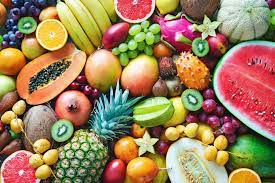


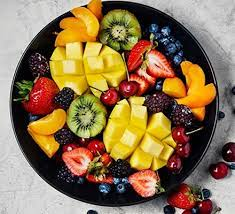


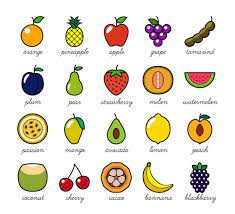


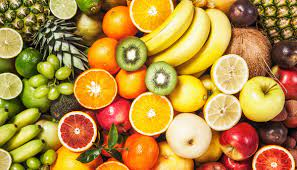


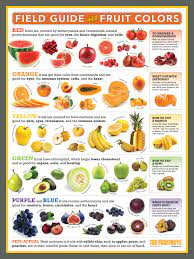


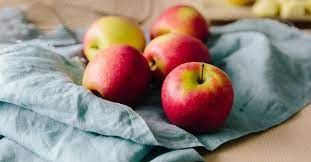


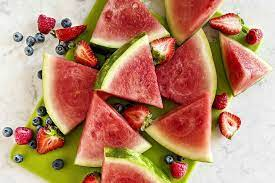


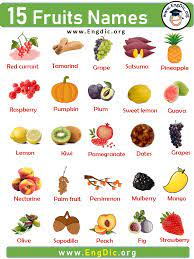


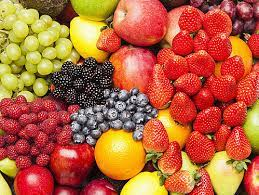


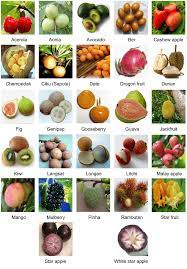

In [13]:
get_google_images('fruits')


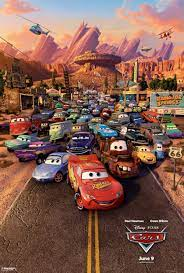


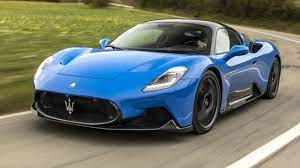


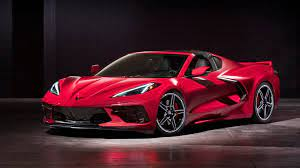


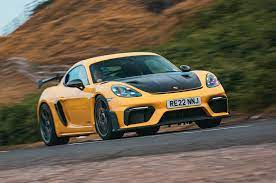


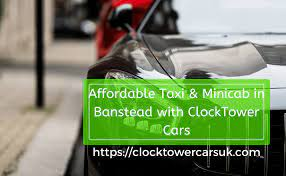


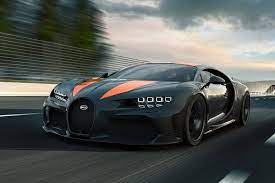


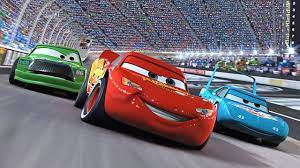


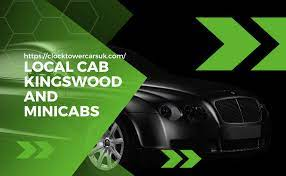


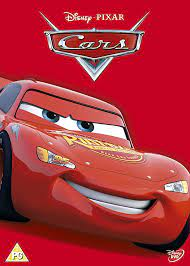


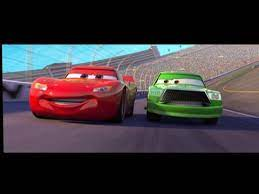

In [14]:
get_google_images('cars')


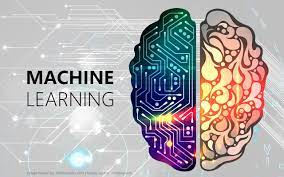


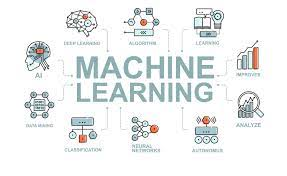


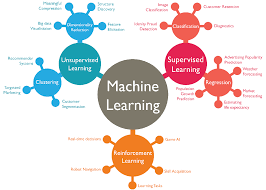


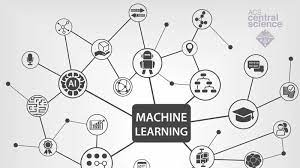


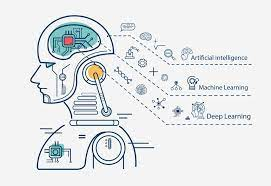


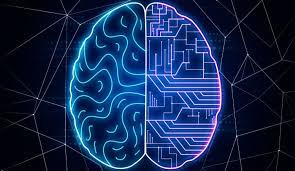


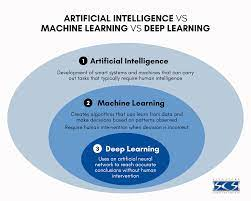


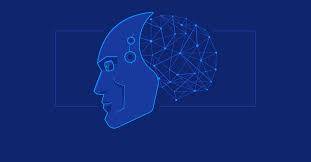


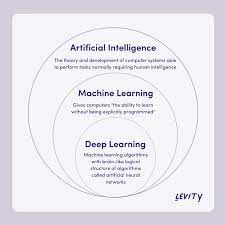


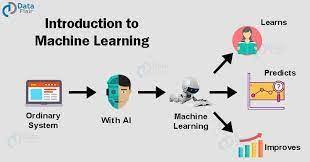

In [15]:
get_google_images('Machine Learning')


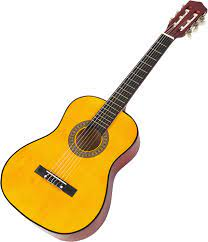


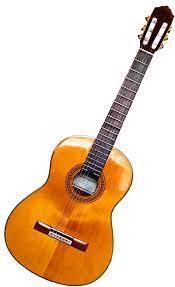


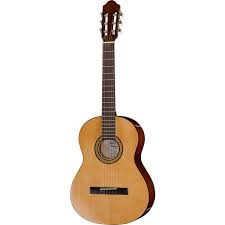


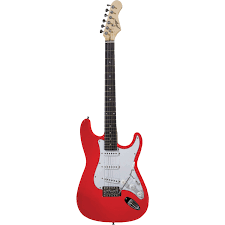


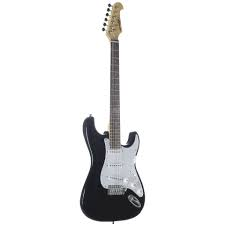


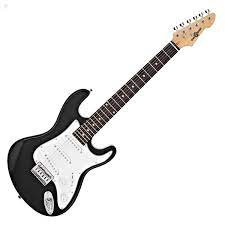


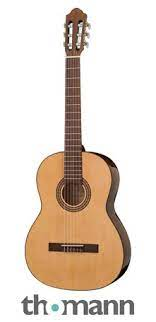


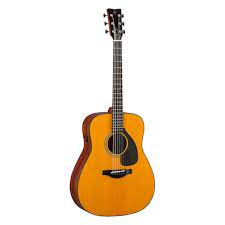


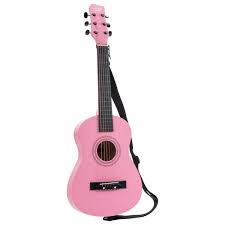


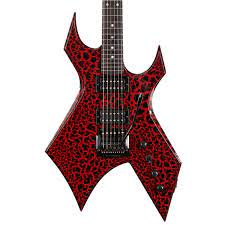

In [16]:
get_google_images('Guitar')


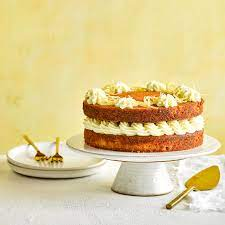


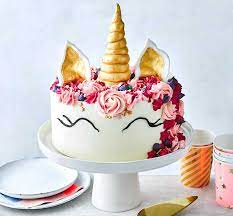


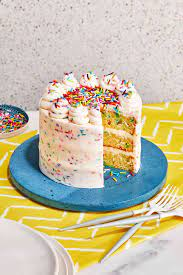


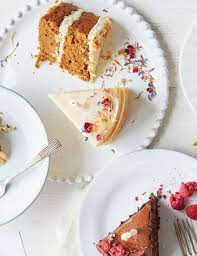


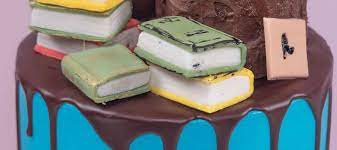


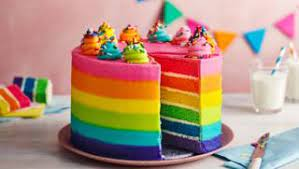


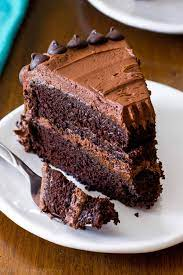


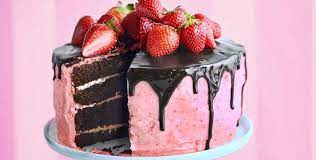


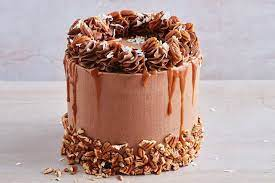


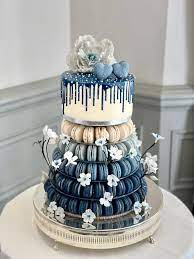

In [17]:
get_google_images('Cakes')

4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [18]:
def get_smartphone_details(product_input):

    # Setting up the WebDriver
    service = Service(r"chromedriver.exe")
    driver = webdriver.Chrome(service=service)

    url = 'https://www.flipkart.com/'
    driver.get(url)
    # Clicking the X button to close the popup
    x_button = driver.find_element(By.XPATH, '//button[@class="_2KpZ6l _2doB4z"]')
    x_button.click()

    # Finding the search bar and entering the search query for the product
    product = driver.find_element(By.CLASS_NAME, "_3704LK")
    product.send_keys(product_input)

    # Clicking the search button
    search = driver.find_element(By.CLASS_NAME, "L0Z3Pu")
    search.click()
    time.sleep(3) # Giving time to load the page
    
    url_list = []
    urls = driver.find_elements(By.XPATH, '//a[@class="_1fQZEK"]')
    for url in urls:
        url_list.append(url.get_attribute('href'))
        
    product_details = []
    
    for url in url_list:
        driver.get(url)
        time.sleep(3)
        name = driver.find_element(By.CLASS_NAME, "B_NuCI").text
        price = driver.find_element(By.XPATH, '//div[@class="_30jeq3 _16Jk6d"]').text

        read_more = driver.find_element(By.XPATH, '//button[@class="_2KpZ6l _1FH0tX"]').click()

        time.sleep(2)

        color_row = driver.find_element(By.XPATH, '//tr[@class="_1s_Smc row" and contains(., "Color")]')
        color = color_row.find_element(By.CLASS_NAME, "_21lJbe").text

        display_row = driver.find_element(By.XPATH, '//tr[@class="_1s_Smc row" and contains(., "Display Size")]')
        display = display_row.find_element(By.CLASS_NAME, "_21lJbe").text

        rom_row = driver.find_element(By.XPATH, '//tr[@class="_1s_Smc row" and contains(., "Internal Storage")]')
        rom = rom_row.find_element(By.CLASS_NAME, "_21lJbe").text

        ram_row = driver.find_element(By.XPATH, '//tr[@class="_1s_Smc row" and contains(., "RAM")]')
        ram = ram_row.find_element(By.CLASS_NAME, "_21lJbe").text

        pc_row = driver.find_element(By.XPATH, 
                                     '//tr[@class="_1s_Smc row" and contains(., "Primary Camera") and contains(., "MP")]')
        pc = pc_row.find_element(By.CLASS_NAME, "_21lJbe").text

        try:
            sc_row = driver.find_element(By.XPATH, 
                                         '//tr[@class="_1s_Smc row" and contains(., "Secondary Camera") and contains(., "MP")]')
            sc = sc_row.find_element(By.CLASS_NAME, "_21lJbe").text
        except:
            sc = '-'

        battery_row = driver.find_element(By.XPATH, '//tr[@class="_1s_Smc row" and contains(., "Battery Capacity")]')
        battery = battery_row.find_element(By.CLASS_NAME, "_21lJbe").text


        product_data = {
            'Name': name,
            'Brand': name.split()[0],
            'Colour': color,
            'ROM': rom,
            'RAM': ram,
            'Primary Camera': pc,
            'Secondary Camera': sc,
            'Display Size': display,
            'Battery Capacity': battery,
            'Price': price,
            'Product URL': url
        }

        product_details.append(product_data)
    
    driver.quit()
        
    df = pd.DataFrame(product_details)
    return df

In [19]:
get_smartphone_details('Samsung S23')

,Name,Brand,Colour,ROM,RAM,Primary Camera,Secondary Camera,Display Size,Battery Capacity,Price,Product URL
0,"SAMSUNG Galaxy S23 5G (Phantom Black, 256 GB) ...",SAMSUNG,Phantom Black,256 GB,8 GB,50MP + 10MP + 12MP,12MP Front Camera,15.49 cm (6.1 inch),3900 mAh,"₹79,999",https://www.flipkart.com/samsung-galaxy-s23-5g...
1,"SAMSUNG Galaxy S23 5G (Cream, 256 GB) (8 GB RAM)",SAMSUNG,Cream,256 GB,8 GB,50MP + 10MP + 12MP,12MP Front Camera,15.49 cm (6.1 inch),3900 mAh,"₹79,999",https://www.flipkart.com/samsung-galaxy-s23-5g...
2,"SAMSUNG Galaxy S23 5G (Green, 256 GB) (8 GB RAM)",SAMSUNG,Green,256 GB,8 GB,50MP + 10MP + 12MP,12MP Front Camera,15.49 cm (6.1 inch),3900 mAh,"₹79,999",https://www.flipkart.com/samsung-galaxy-s23-5g...
3,"SAMSUNG Galaxy S23 5G (Lavender, 256 GB) (8 G...",SAMSUNG,Lavender,256 GB,8 GB,50MP + 10MP + 12MP,12MP Front Camera,15.49 cm (6.1 inch),3900 mAh,"₹79,999",https://www.flipkart.com/samsung-galaxy-s23-5g...
4,"SAMSUNG Galaxy S23 5G (Phantom Black, 128 GB) ...",SAMSUNG,Phantom Black,128 GB,8 GB,50MP + 10MP + 12MP,12MP Front Camera,15.49 cm (6.1 inch),3900 mAh,"₹74,999",https://www.flipkart.com/samsung-galaxy-s23-5g...
5,"SAMSUNG Galaxy S23 5G (Green, 128 GB) (8 GB RAM)",SAMSUNG,Green,128 GB,8 GB,50MP + 10MP + 12MP,12MP Front Camera,15.49 cm (6.1 inch),3900 mAh,"₹74,999",https://www.flipkart.com/samsung-galaxy-s23-5g...
6,"SAMSUNG Galaxy S23 5G (Cream, 128 GB) (8 GB RAM)",SAMSUNG,Cream,128 GB,8 GB,50MP + 10MP + 12MP,12MP Front Camera,15.49 cm (6.1 inch),3900 mAh,"₹74,999",https://www.flipkart.com/samsung-galaxy-s23-5g...
7,"SAMSUNG Galaxy S23 5G (Lavender, 128 GB) (8 G...",SAMSUNG,Lavender,128 GB,8 GB,50MP + 10MP + 12MP,12MP Front Camera,15.49 cm (6.1 inch),3900 mAh,"₹74,999",https://www.flipkart.com/samsung-galaxy-s23-5g...
8,"SAMSUNG Galaxy S23 Plus 5G (Cream, 256 GB) (8...",SAMSUNG,Cream,256 GB,8 GB,50MP + 10MP + 12MP,12MP Front Camera,16.76 cm (6.6 inch),4700 mAh,"₹94,999",https://www.flipkart.com/samsung-galaxy-s23-pl...
9,"SAMSUNG Galaxy S23 Plus 5G (Phantom Black, 256...",SAMSUNG,Phantom Black,256 GB,8 GB,50MP + 10MP + 12MP,12MP Front Camera,16.76 cm (6.6 inch),4700 mAh,"₹94,999",https://www.flipkart.com/samsung-galaxy-s23-pl...


5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps. 

In [20]:
def get_city_coordinates(city_input):
    # Setting up the WebDriver
    service = Service(r"chromedriver.exe")
    driver = webdriver.Chrome(service=service)

    url = 'https://www.google.com/maps'
    driver.get(url)
    
    #Rejecting all cookies
    driver.find_element(By.XPATH, '//span[@class="VfPpkd-vQzf8d" and text()="Reject all"]').click()
    
    city = driver.find_element(By.XPATH, '//input[@class="searchboxinput xiQnY"]')
    city.send_keys(city_input)
    city.send_keys(Keys.ENTER)
    time.sleep(3)
    
    current_url = driver.current_url
    
    # Defineing the regex pattern to match the latitude and longitude
    pattern = r"@([-+]?\d+\.\d+),([-+]?\d+\.\d+)"

    # Extracting the latitude and longitude using regex
    match = re.search(pattern, current_url)
    
    driver.quit()
    
    if match:
        latitude = match.group(1)
        longitude = match.group(2)
        
        
    return latitude, longitude

In [21]:
city_input = 'London'
get_city_coordinates(city_input)

('51.5276562', '-0.7595389')

In [22]:
city_input = 'New Delhi'
get_city_coordinates(city_input)

('28.5275593', '76.8800323')

6. Write a program to scrap all the available details of best gaming laptops from digit.in

In [23]:
# Setting up the WebDriver
service = Service(r"chromedriver.exe")
driver = webdriver.Chrome(service=service)
url = 'https://www.digit.in/'
driver.get(url)
driver.maximize_window()

In [24]:
driver.find_element(By.XPATH, '//span[@class="arrow_down laptops"]').click()

In [25]:
driver.find_elements(By.XPATH, '//span[@class="tablinks laptops-4"]')[1].click()

In [26]:
driver.find_element(By.XPATH,
                    '//div[@class="slide" and contains(., "Best Gaming Laptops in India with Price and Specs")]').click()

In [27]:
laptop_containers = driver.find_elements(By.CLASS_NAME, "specfpro_details_cont")

In [28]:
laptop_details = []

for l in laptop_containers:
    name = l.find_element(By.XPATH, './/h3').text
    rows = l.find_elements(By.XPATH, './/tr')
    
    processor = rows[1].text.strip().split(': ')[1]
    display = rows[2].text.strip().split(': ')[1]
    os = rows[3].text.strip().split(': ')[1]
    memory = rows[4].text.strip().split(': ')[1]
    ram = memory.split(' & ')[0]
    rom = memory.split(' & ')[1]
    graphics = rows[5].text.strip().split(': ')[1]
    body = rows[6].text.strip().split(': ')[1]
    price = rows[7].text.strip().split(': ')[1].replace('₹', '').strip()
    
    
    data = {
        'Laptop': name,
        'Processor': processor,
        'OS': os,
        'RAM': ram,
        'Memory': rom,
        'Graphics Processor': graphics,
        'Body': body,
        'Price (in ₹)': price
    }
    
    laptop_details.append(data)

In [29]:
driver.quit()

In [30]:
df = pd.DataFrame(laptop_details)
df

,Laptop,Processor,OS,RAM,Memory,Graphics Processor,Body,Price (in ₹)
0,HP OMEN 17 (2023),13th Gen Intel Core i7-13700HX 16 core process...,Windows 11 Home,16 GB DDR5GB RAM,1 TB SSD,12 GB DDR6 NVIDIA GeForce RTX 4080 Graphics card,397.1 x 262 x 27 mm dimension & 2.78 kg weight,"269,777"
1,MSI Titan GT77 12UHS,12th Gen Intel Core i9-12900HX 16 core process...,Windows 11 Home,64 GB DDR5GB RAM,2 TB SSD,16 GB DDR6 NVIDIA GeForce RTX 3080Ti Graphics ...,397 x 330 x 23 mm dimension & 3.3 kg weight,"499,990"
2,Lenovo Legion 5i Pro,12th Gen Intel Core i7-12700H 14 core processo...,Windows 11 Home,32 GB DDR5GB RAM,1 TB SSD,NVIDIA GeForce RTX 3070 Ti Graphics card,359.9 x 264.4 x 19.9 mm dimension & 3.6 kg weight,"211,990"
3,ASUS ROG Strix Scar 18 2023,13th Gen Intel Core i9-13980HX 24 core process...,Windows 11 Home,32 GB DDR5GB RAM,1 TB SSD,12 GB DDR6 NVIDIA GeForce RTX 4080 Graphics card,294 x 399 x 23 mm dimension & 3.1 kg weight,"279,990"
4,Acer Predator Helios Neo 16,13th Gen Intel Core i7-13700HX processor,Windows 11 Home,16 GB DDR5GB RAM,1 TB SSD,8 GB DDR6 NVIDIA GeForce RTX 4060 Graphics card,360 x 279 x 28 mm dimension & 2.6 kg weight,"149,990"
5,ASUS ROG Zephyrus G14,AMD Ryzen 9-6900HS 8 core processor with 4.9 G...,Windows 11 Home,16 GB DDR5GB RAM,1 TB SSD,8 GB DDR6 AMD Radeon RX 6700S Graphics card,312 x 227 x 19 mm dimension & 1.65 kg weight,"156,990"
6,MSI Cyborg 15,12th Gen Intel Core i7-12650H 10 core processo...,Windows 11 Home,16 GB DDR5GB RAM,1 TB SSD,8 GB DDR6 NVIDIA GeForce RTX 4060 Graphics card,& 1.98 kg weight,"130,990"


7. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”. 

In [31]:
def get_all_billionaires():
    
    # Setting up the WebDriver
    service = Service(r"chromedriver.exe")
    driver = webdriver.Chrome(service=service)
    url = 'https://www.forbes.com/'
    driver.get(url)
    
    time.sleep(3)

    # Closing the cookies popup
    driver.find_element(By.XPATH, '//button[@class="root__OblK1 root__lVmOp closeButton__SQejO"]').click()
    
    time.sleep(2)
    

    driver.find_element(By.CLASS_NAME, "_69hVhdY4").click()

    driver.find_element(By.XPATH, '//li[@class="TjJgrPSg cD45ib6e primary" and contains(., "Billionaires")]').click()

    driver.find_element(By.XPATH,
                        '//li[@class="TjJgrPSg _2bNo56RE secondary" and contains(., "Billionaires")]').click()


    billionaire_data = []
    
    driver.maximize_window() # So that all the columns are visible

    # Going through all pages 
    # page number is not known ahead of time - so I am going till 20. when the last page is reached, the loop will break
    for page in range(20):

        rows = driver.find_elements(By.XPATH, '//div[contains(@class, "TableRow_row__L-0Km")]')

        for row in rows:
            cols = row.find_elements(By.XPATH, './/div[@class="TableRow_cell__db-hv Table_cell__houv9"]')

            rank = cols[0].text
            name = cols[1].text
            net_worth = cols[2].text
            age = cols[3].text
            country = cols[4].text
            source = cols[5].text
            industry = cols[6].text

            billionaire = {
                'Rank': rank,
                'Name': name,
                'Net worth': net_worth,
                'Age': age,
                'Citizenship': country,
                'Source': source,
                'Industry': industry
            }

            billionaire_data.append(billionaire)

        try:
            next_page = driver.find_element(By.XPATH,
                                            '//button[@class="Pagination_paginationBtn__UIBE-" and contains(., "Next")]')
            next_page.click()
        except:
            break

        time.sleep(2)


    driver.quit()

    df = pd.DataFrame(billionaire_data)
    return df

In [32]:
get_all_billionaires()

,Rank,Name,Net worth,Age,Citizenship,Source,Industry
0,1,Bernard Arnault & family,$211 B,74,France,LVMH,Fashion & Retail
1,2,Elon Musk,$180 B,51,United States,"Tesla, SpaceX",Automotive
2,3,Jeff Bezos,$114 B,59,United States,Amazon,Technology
3,4,Larry Ellison,$107 B,78,United States,Oracle,Technology
4,5,Warren Buffett,$106 B,92,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
2635,2540,Yu Rong,$1 B,51,China,Health clinics,Healthcare
2636,2540,"Richard Yuengling, Jr.",$1 B,80,United States,Beer,Food & Beverage
2637,2540,Zhang Gongyun,$1 B,60,China,Tyre manufacturing machinery,Manufacturing
2638,2540,Zhang Guiping & family,$1 B,71,China,Real estate,Real Estate


8. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video. 

In [33]:
def get_details_youtube(url):
    
    # Setting up the WebDriver
    service = Service(r"chromedriver.exe")
    driver = webdriver.Chrome(service=service)

    driver.get(url)
    driver.maximize_window()
    time.sleep(3)

    # Rejecting all cookies
    driver.find_element(By.XPATH, '//button[contains(., "Reject all")]').click()
    time.sleep(3)

    # Pausing the video
    driver.find_element(By.XPATH, '//button[@class="ytp-play-button ytp-button"]').click()

    # Scrolling to the end of the comments
    prev_height = 0

    while True:
        height = driver.execute_script("""
            function getActualHeight()
            {
                return Math.max(
                    Math.max(document.body.scrollHeight, document.documentElement.scrollHeight),
                    Math.max(document.body.offsetHeight, document.documentElement.offsetHeight),
                    Math.max(document.body.clientHeight, document.documentElement.clientHeight)
                );
            }
            return getActualHeight();
        """) # Getting the actual height of the page

        driver.execute_script(f"window.scrollTo({prev_height}, {prev_height + 300})") # Scrolling
        time.sleep(2) # Waiting to load comments
        prev_height+= 300

        if prev_height >= height:
            break


    # Finding all comments, time posted and upvotes with the XPATH
    comments = driver.find_elements(By.XPATH, '//yt-formatted-string[@class="style-scope ytd-comment-renderer"]')
    times = driver.find_elements(By.XPATH,
        '//a[@class="yt-simple-endpoint style-scope yt-formatted-string" and contains(., "ago")]')

    upvotes = driver.find_elements(By.XPATH, '//span[@id="vote-count-middle"]')

    comments_list = []
    times_list = []
    upvotes_list = []

    # Extracting the text from the found elements
    for c in comments:
        comments_list.append(c.text)

    for t in times:
        times_list.append(t.text)

    for u in upvotes:
        upvotes_list.append(u.text)
        

    driver.quit()

    df = pd.DataFrame({
        'Comment': comments_list,
        'Time posted': times_list,
        'Upvotes': upvotes_list
    })
    return df

In [35]:
get_details_youtube('https://www.youtube.com/watch?v=ua-CiDNNj30')

,Comment,Time posted,Upvotes
0,8:41 diagram venn\n15:08 DS pathway\n19:40 rol...,3 years ago (edited),187
1,This is my first time in data science. I've li...,2 years ago,300
2,This is excellent even for people already work...,3 years ago (edited),21
3,2:12:19 so far and cannot imagine how much eff...,3 years ago,198
4,"Sir, you are one of the best lecturers whose c...",3 years ago,19
...,...,...,...
679,So Sophie is scammer.,2 years ago,
680,Completely useless. You can close the video on...,2 years ago,1
681,i found this video quite awful...,3 years ago,
682,I'm an hour in and:\n\n1) You haven't really s...,3 years ago,


9. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description.

In [75]:
def get_hostels_city(city):

    # Setting up the WebDriver
    service = Service(r"chromedriver.exe")
    driver = webdriver.Chrome(service=service)
    driver.maximize_window()

    url = 'https://www.hostelworld.com/'
    driver.get(url)

    time.sleep(3)
    

    driver.find_element(By.ID, "truste-consent-button").click()

    search_bar = driver.find_element(By.XPATH, '//input[@class="native-input body-1-reg"]')
    search_bar.send_keys(city)
    time.sleep(2)

    # Selecting 'London' from the dropdown list
    driver.find_element(By.XPATH,
            '/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/ul/li[2]/button').click()

    # Clicking the Search Button
    driver.find_element(By.XPATH, '//button[@class="btn-content large-button"]').click()
    time.sleep(2)

    # Storing details from property cards in all properties page
    property_details = []

    # There are two pages
    for page in range(2):

        property_cards = driver.find_elements(By.XPATH, '//div[@class="property-card"]')[1:]
        flag = 0

        for i in property_cards:
            try:
                a_div = i.find_element(By.XPATH, './/a')
            except:
                a_div = i.find_element(By.XPATH, './/a[@class="nuxt-link"]')
            url = a_div.get_attribute('href')
            
            # The page loads differently every time - so using try except block
            
            try:
                name = i.find_element(By.XPATH, './/div[@class="property-name"]').text
                flag = 1
            except:
                name = i.find_element(By.XPATH, './/h2[contains(@class, "title")]').text
                flag = -1

            try:
                if flag == 1:
                    rating = i.find_element(By.XPATH, './/div[@class="score"]').text
                elif flag == -1:
                    rating = i.find_element(By.XPATH, './/div[contains(@class, "score")]').text
            except:
                rating = '-'    

            try:
                rating_words = i.find_element(By.CLASS_NAME, "keyword").text
            except:
                rating_words = '-'

            try:
                if flag == 1:
                    distance = i.find_element(By.CLASS_NAME, 
                                "distance-description").text.split('km')[0].replace('- ', '').replace('Hostel  ', '')
                elif flag == -1:
                    distance = i.find_element(By.CLASS_NAME, 
                                "description").text.split('km')[0].replace('- ', '').replace('Hostel  ', '')
            except:
                distance = '-'


            data = {
                'URL': url,
                'Name': name,
                'Rating': rating,
                'Overall Review': rating_words,
                'Distance from City Center (in km)': distance
            }

            property_details.append(data)

        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
        time.sleep(1)

        try:
            if flag == 1:
                next_page = driver.find_element(By.XPATH, '//button[@class="pill-content page-nav nav-right icon-only"]')
                
            elif flag == -1:
                next_page = driver.find_element(By.XPATH, '//div[@class="pagination-item pagination-next"]')
            next_page.click()
            time.sleep(3)
        except:
            break

    # Adding details from each property page        
    hostel_details = []

    for p in property_details:
        driver.get(p['URL'])
        time.sleep(3)

        p['Total Reviews'] = driver.find_elements(By.CLASS_NAME, "reviews")[0].text.split()[0]


        p['Property Description'] = driver.find_element(By.XPATH,
                        '//div[@class="content collapse-content"]').text

        try:
            private = driver.find_element(By.XPATH, '//div[@class="availability-table" and contains(., "Private Rooms")]')
            try:
                pprice_container = private.find_element(By.XPATH,
                                    './/div[@class="rate-price-container" and contains(., "Non-refundable")]')
            except:
                pprice_container = private.find_element(By.XPATH,
                                    './/div[@class="rate-price-container" and contains(., "Standard")]')
            p['Privates from price'] = pprice_container.find_element(By.CLASS_NAME, "price").text
        except:
            p['Privates from price'] = 'Not available'

        try:
            dorm = driver.find_element(By.XPATH, '//div[@class="availability-table" and contains(., "Dorm Beds")]')
            try:
                dprice_container = dorm.find_element(By.XPATH,
                                                 './/div[@class="rate-price-container" and contains(., "Non-refundable")]')
            except:
                dprice_container = dorm.find_element(By.XPATH,
                                                 './/div[@class="rate-price-container" and contains(., "Standard")]')
            p['Dorms from price'] = dprice_container.find_element(By.CLASS_NAME, "price").text
        except:
            p['Dorms from price'] = 'Not available'

        facilities = ''
        facilities_all = driver.find_elements(By.XPATH, '//ul[@class="facilities"]')
        for fa in facilities_all:
            facility = fa.find_elements(By.XPATH, './/li')
            facilities+=", ".join([f.text for f in facility])+', '

        p['Facilities'] = facilities[:-2]

        hostel_details.append(p)

        time.sleep(3)
        
    driver.quit()

    df = pd.DataFrame(hostel_details)
    df.drop(columns=['URL'], inplace=True)
    return df

In [76]:
get_hostels_city('London')

,Name,Rating,Overall Review,Distance from City Center (in km),Total Reviews,Property Description,Privates from price,Dorms from price,Facilities
0,Wombat's City Hostel London,9.0,Superb,3.6,14896,A safe haven in the middle of the metropolis: ...,£184.80,£55.23,"Linen Included, Free City Maps, Free WiFi, Fre..."
1,Onefam Notting Hill by Hostel One,9.6,Superb,5.5,2059,The perfect place for solo travelers to connec...,Not available,£74.18,"Linen Included, Free WiFi, Free Internet Acces..."
2,St Christopher's Village,7.9,Very Good,1.8,12155,St Christopher's Inn at The Village in London ...,Not available,£34.20,"Linen Included, Free WiFi, Free Internet Acces..."
3,Urbany Hostel London,9.4,Superb,5.4,780,"Welcome to Urbany Hostel London, our first int...",£202.70,£72.38,"Linen Included, Free WiFi, Security Lockers, M..."
4,NX London Hostel,8.3,Fabulous,6.1,1885,Welcome to NX London Hostel!\n\nPLEASE READ IN...,£139.62,£25.27,"Free Breakfast, Linen Included, Towels Include..."
5,Generator London,7.4,Very Good,3,7500,Generator London is a design hotel-hostel loca...,£113.10,Not available,"Linen Included, Free City Maps, Free WiFi, Fre..."
6,Safestay London Elephant & Castle,7.5,Very Good,1.7,4957,Safestay at Elephant & Castle is ideal if you ...,Not available,£27.51,"Linen Included, Free WiFi, Security Lockers, K..."
7,Phoenix Hostel,7.5,Very Good,4.2,4126,"The Phoenix Bar & Hostel, housed in a homely E...",Not available,Not available,"Linen Included, Free City Maps, Free WiFi, Fre..."
8,Safestay London Kensington Holland Park,7.1,Very Good,5.8,1528,Safestay Holland Park\n\nSafestay Holland Park...,Not available,£26.58,"Linen Included, Free WiFi, Security Lockers, K..."
9,No.8 Seven Sisters,5.7,-,9,4010,"For Great Facilities, Comfort & Affordability ...",Not available,£14.95,"Linen Included, Free WiFi, Security Lockers, K..."
